In [3]:
import numpy as np
import pandas as pd

pd.options.display.max_columns=500
pd.options.display.max_rows=200
# to set dataframes to show more cols & rows

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pylab
from pylab import plot, show
from pylab import legend, title, xlabel, ylabel
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [4]:
df = pd.read_csv(r'C:\Users\User\Downloads\exam_data.csv')

In [5]:
df.head(10) 

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [7]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

## 1. Data Understanding and Preprocessing:
o Load and inspect the dataset.
o Handle missing values appropriately.
o Detect and handle outliers.

In [8]:
df.isnull().sum() #cheacking if there any null values

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Val

In [9]:
# Compute the correlation matrix
correlation_matrix = df.corr()

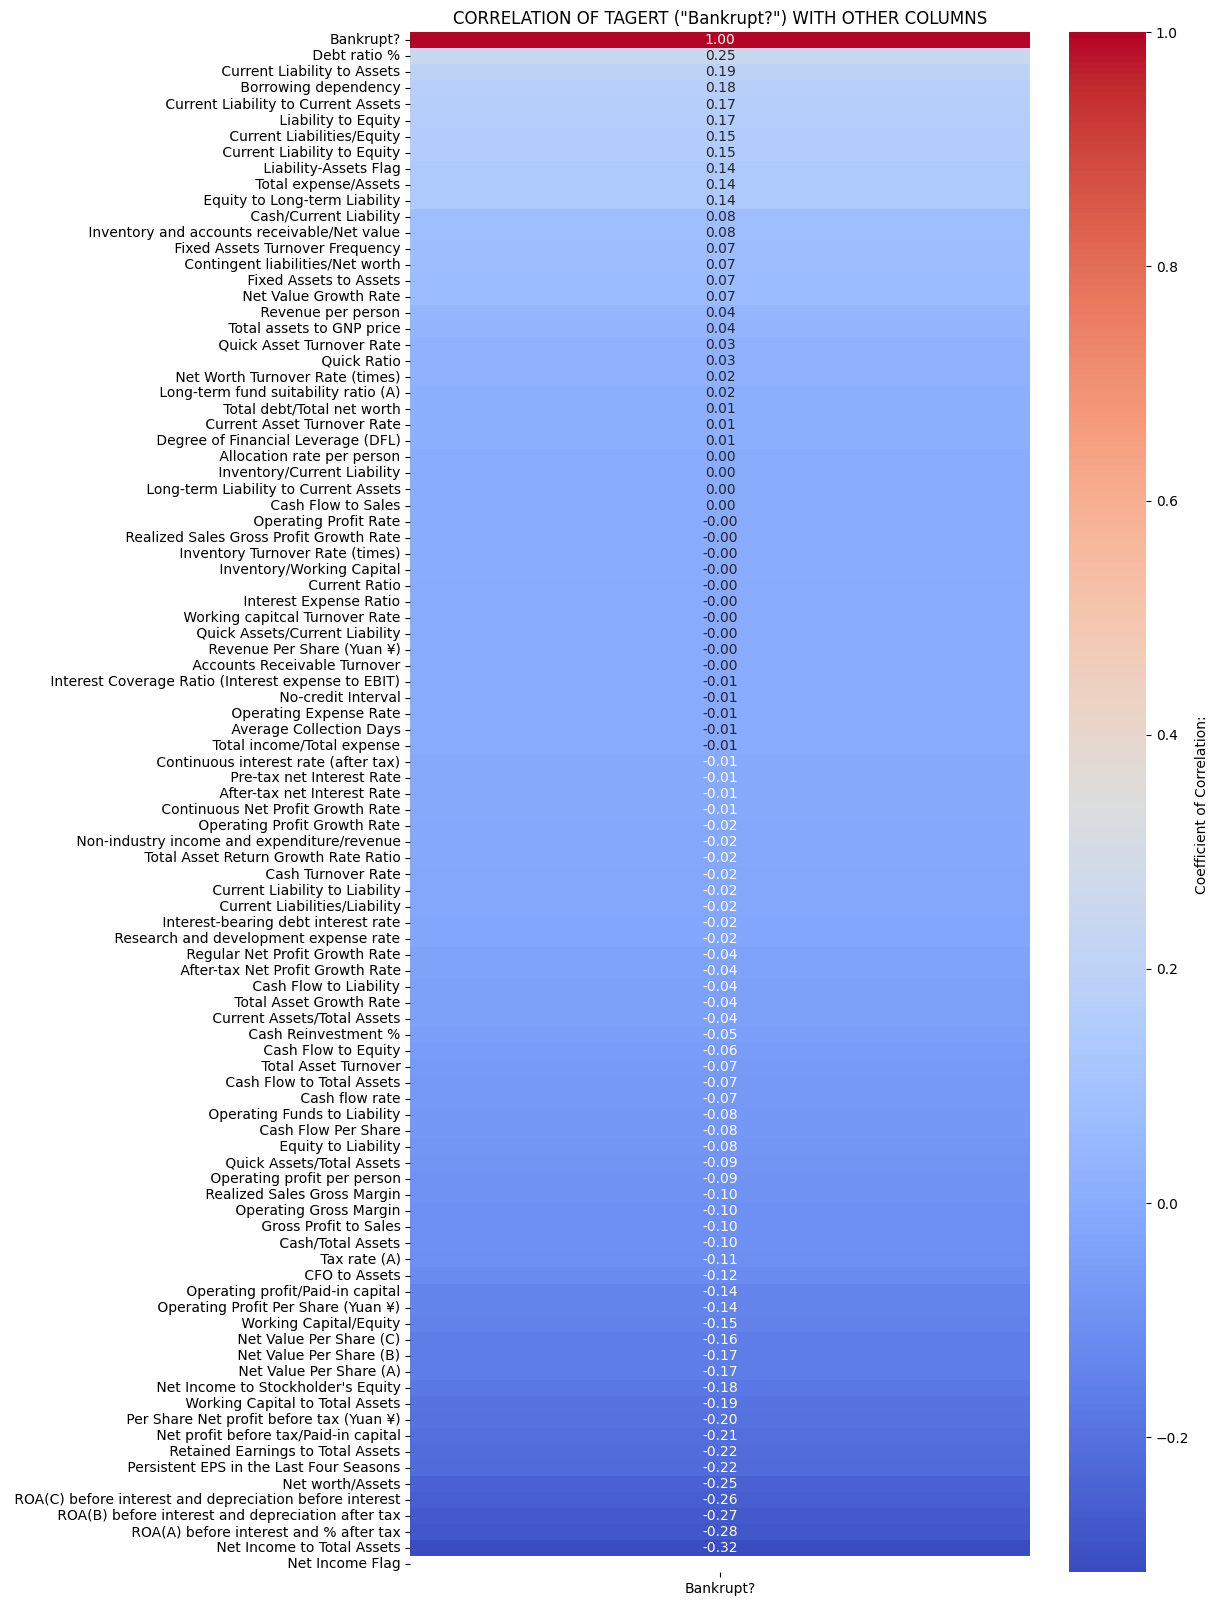

In [11]:
# correlation of each feature with --> 95 columns  -->  target variable --> 1 column
correlation_target = correlation_matrix['Bankrupt?'].sort_values(ascending=False)
#correlations with the target variable
plt.figure(figsize=(10, 20))
sns.heatmap(correlation_target.to_frame(), annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Coefficient of Correlation: '})
plt.title('CORRELATION OF TAGERT ("Bankrupt?") WITH OTHER COLUMNS')
plt.show()

# inSIGHTS:
--> highest positive correlation coefficient with bankrupt ==> Debt ratio %
--> The higher the debt ratio, the more likely a company is to go bankrupt. 
--> a high debt ratio indicates that a company has a lot of debt relative to its assets, which can make it difficult for        the company to meet its financial obligations.

--> highest negative correlation coefficient with bankrupt ==> Net income to Total assets
--> The lower the net income to total assets, the more likely a company is to go bankrupt. 
--> a low net income to total assets ratio indicates that a company is not generating enough income to cover its expenses       and maintain its assets, which can eventually lead to bankruptcy.

In [12]:
correlation_target = correlation_matrix['Bankrupt?']
(correlation_target).sort_values(ascending=False) 

Bankrupt?                                                   1.000000
 Debt ratio %                                               0.250161
 Current Liability to Assets                                0.194494
 Borrowing dependency                                       0.176543
 Current Liability to Current Assets                        0.171306
 Liability to Equity                                        0.166812
 Current Liabilities/Equity                                 0.153828
 Current Liability to Equity                                0.153828
 Liability-Assets Flag                                      0.139212
 Total expense/Assets                                       0.139049
 Equity to Long-term Liability                              0.139014
 Cash/Current Liability                                     0.077921
 Inventory and accounts receivable/Net value                0.075278
 Fixed Assets Turnover Frequency                            0.072818
 Contingent liabilities/Net worth 

In [13]:
# abs : negative values -->  postitve and sort -->  in descending order
correlations_sorted = correlation_matrix['Bankrupt?'].abs().sort_values(ascending=False)

In [17]:
columns_top_20 = correlations_sorted[1:21].index.tolist() #extracting column names of top 20 columns

In [18]:
columns_top_20.append('Bankrupt?')

In [19]:
columns_top_20

[' Net Income to Total Assets',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' ROA(C) before interest and depreciation before interest',
 ' Net worth/Assets',
 ' Debt ratio %',
 ' Persistent EPS in the Last Four Seasons',
 ' Retained Earnings to Total Assets',
 ' Net profit before tax/Paid-in capital',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Current Liability to Assets',
 ' Working Capital to Total Assets',
 " Net Income to Stockholder's Equity",
 ' Borrowing dependency',
 ' Current Liability to Current Assets',
 ' Liability to Equity',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (C)',
 ' Current Liability to Equity',
 'Bankrupt?']

In [20]:
df=df[columns_top_20]

In [22]:
df.head(10)

,Net Income to Total Assets,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,ROA(C) before interest and depreciation before interest,Net worth/Assets,Debt ratio %,Persistent EPS in the Last Four Seasons,Retained Earnings to Total Assets,Net profit before tax/Paid-in capital,Per Share Net profit before tax (Yuan ¥),Current Liability to Assets,Working Capital to Total Assets,Net Income to Stockholder's Equity,Borrowing dependency,Current Liability to Current Assets,Liability to Equity,Net Value Per Share (A),Net Value Per Share (B),Net Value Per Share (C),Current Liability to Equity,Bankrupt?
0,0.716845,0.424389,0.405750,0.370594,0.792424,0.207576,0.169141,0.903225,0.137757,0.138736,0.147308,0.672775,0.827890,0.390284,0.118250,0.290202,0.147950,0.147950,0.147950,0.339077,1
1,0.795297,0.538214,0.516730,0.464291,0.828824,0.171176,0.208944,0.931065,0.168962,0.169918,0.056963,0.751111,0.839969,0.376760,0.047775,0.283846,0.182251,0.182251,0.182251,0.329740,1
2,0.774670,0.499019,0.472295,0.426071,0.792484,0.207516,0.180581,0.909903,0.148036,0.142803,0.098162,0.829502,0.836774,0.379093,0.025346,0.290189,0.177911,0.177911,0.193713,0.334777,1
3,0.739555,0.451265,0.457733,0.399844,0.848535,0.151465,0.193722,0.906902,0.147561,0.148603,0.098715,0.725754,0.834697,0.379743,0.067250,0.281721,0.154187,0.154187,0.154187,0.331509,1
4,0.795016,0.538432,0.522298,0.465022,0.893491,0.106509,0.212537,0.913850,0.167461,0.168412,0.110195,0.751822,0.839973,0.375025,0.047725,0.278514,0.167502,0.167502,0.167502,0.330726,1
5,0.710420,0.415177,0.419134,0.388680,0.819573,0.180427,0.174435,0.903041,0.137825,0.138811,0.139002,0.686729,0.829939,0.381448,0.099522,0.285087,0.155577,0.155577,0.155577,0.335534,1
6,0.736619,0.445704,0.436158,0.390923,0.783898,0.216102,0.161482,0.911441,0.127939,0.128945,0.115920,0.729416,0.829980,0.384999,0.060765,0.292504,0.158822,0.158822,0.158822,0.337392,0
7,0.815350,0.570922,0.559077,0.508361,0.891798,0.108202,0.225206,0.935449,0.179519,0.180462,0.087042,0.797005,0.841459,0.374219,0.030201,0.278607,0.176984,0.176984,0.176984,0.329804,0
8,0.803647,0.545137,0.543284,0.488519,0.941409,0.058591,0.218398,0.935200,0.172159,0.173157,0.058060,0.813738,0.840487,0.370253,0.021710,0.276423,0.184189,0.184189,0.184189,0.328093,0
9,0.804195,0.550916,0.542963,0.495686,0.878707,0.121293,0.217831,0.938290,0.175658,0.176621,0.094563,0.825696,0.840688,0.374509,0.025494,0.279388,0.177447,0.177447,0.177447,0.330409,0


In [23]:
df.columns

Index([' Net Income to Total Assets',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' ROA(C) before interest and depreciation before interest',
       ' Net worth/Assets', ' Debt ratio %',
       ' Persistent EPS in the Last Four Seasons',
       ' Retained Earnings to Total Assets',
       ' Net profit before tax/Paid-in capital',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Current Liability to Assets', ' Working Capital to Total Assets',
       ' Net Income to Stockholder's Equity', ' Borrowing dependency',
       ' Current Liability to Current Assets', ' Liability to Equity',
       ' Net Value Per Share (A)', ' Net Value Per Share (B)',
       ' Net Value Per Share (C)', ' Current Liability to Equity',
       'Bankrupt?'],
      dtype='object')

In [24]:
df.columns = df.columns.str.strip()

# outliers

In [27]:
def impute(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
        return df
columns_to_handle = [
    'Net Income to Total Assets', 'ROA(A) before interest and % after tax',
    'ROA(B) before interest and depreciation after tax', 'ROA(C) before interest and depreciation before interest',
    'Net worth/Assets', 'Debt ratio %', 'Persistent EPS in the Last Four Seasons',
    'Retained Earnings to Total Assets', 'Net profit before tax/Paid-in capital',
    'Per Share Net profit before tax (Yuan ¥)', 'Current Liability to Assets',
    'Working Capital to Total Assets', 'Net Income to Stockholder\'s Equity',
    'Borrowing dependency', 'Current Liability to Current Assets', 'Liability to Equity',
    'Net Value Per Share (A)', 'Net Value Per Share (B)', 'Net Value Per Share (C)',
    'Current Liability to Equity']

df_imputed = impute(df.copy(), columns_to_handle)
print(df_imputed.head())

   Net Income to Total Assets  ROA(A) before interest and % after tax  \
0                    0.752193                                0.424389   
1                    0.795297                                0.538214   
2                    0.774670                                0.499019   
3                    0.752193                                0.451265   
4                    0.795016                                0.538432   

   ROA(B) before interest and depreciation after tax  \
0                                           0.405750   
1                                           0.516730   
2                                           0.472295   
3                                           0.457733   
4                                           0.522298   

   ROA(C) before interest and depreciation before interest  Net worth/Assets  \
0                                           0.370594                0.792424   
1                                           0.464291            

In [28]:
print(f"Original_dataframe_shape: {df.shape}")
print(f"Cleaned_dataframe_shape: {df_imputed.shape}")

Original dataframe shape: (6819, 21)
Cleaned dataframe shape: (6819, 21)


In [29]:
df=df_imputed

In [30]:
df.shape

(6819, 21)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 21 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Net Income to Total Assets                               6819 non-null   float64
 1   ROA(A) before interest and % after tax                   6819 non-null   float64
 2   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 3   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 4   Net worth/Assets                                         6819 non-null   float64
 5   Debt ratio %                                             6819 non-null   float64
 6   Persistent EPS in the Last Four Seasons                  6819 non-null   float64
 7   Retained Earnings to Total Assets                        6819 non-null   float64
 8   Net profit before tax/Paid-i

2. Exploratory Data Analysis (EDA):
o Generate descriptive statistics.
o Visualize feature distributions and target variable.
o Analyze relationships between features and the target variable.

In [33]:
correlations_sorted.head()

Bankrupt?                                                   1.000000
 Net Income to Total Assets                                 0.315457
 ROA(A) before interest and % after tax                     0.282941
 ROA(B) before interest and depreciation after tax          0.273051
 ROA(C) before interest and depreciation before interest    0.260807
Name: Bankrupt?, dtype: float64

In [34]:
df.columns
df.columns = df.columns.str.strip()

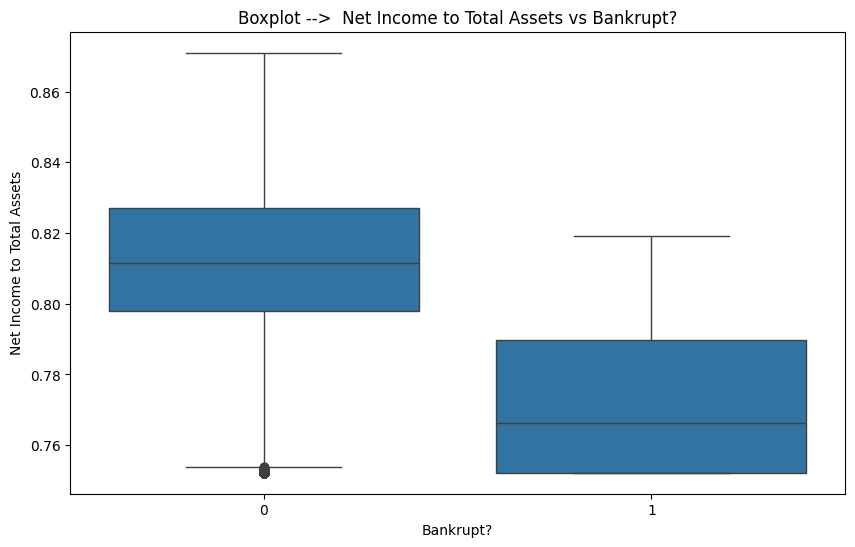

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bankrupt?', y='Net Income to Total Assets', data=df)
plt.title('Boxplot -->  Net Income to Total Assets vs Bankrupt?')
plt.xlabel('Bankrupt?')
plt.ylabel('Net Income to Total Assets')
plt.show()


#Insights:
--> The 50% of "Net Income to Total Assets" value
     --> for bankrupt companies (Bankrupt = 1)-->  falls between -->  0.75 and 0.79
     --> non-bankrupt companies (Bankrupt = 0)-->  falls between -->  0.80 and 0.83. 
--> This suggests that lower "Net Income to Total Assets" values are associated with a higher risk of bankruptcy. 
--> If the "Net Income to Total Assets" value drops below 0.79, the likelihood of bankruptcy increases significantly.

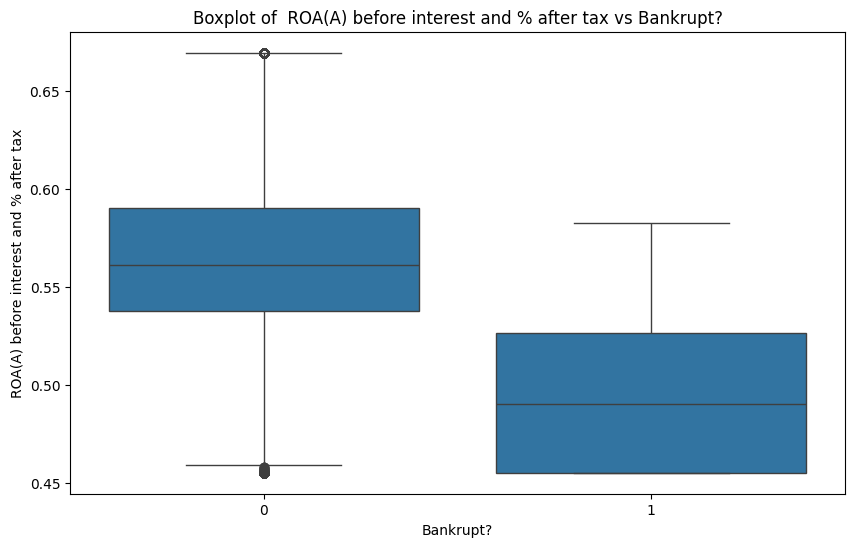

In [324]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bankrupt?', y='ROA(A) before interest and % after tax', data=df)
plt.title('Boxplot of  ROA(A) before interest and % after tax vs Bankrupt?')
plt.xlabel('Bankrupt?')
plt.ylabel('ROA(A) before interest and % after tax')
plt.show()

# obsevations:
# 50% of values of ROA(A) before interest and % after tax for bankrupcy=1 are lies in range 0.46 to 0.53
# 50% of values of ROA(A) before interest and % after tax for bankrupcy=0 are lies in range 0.54 to 0.59

# Chances of bankrupcy are more for lower values of ROA(A) before interest and % after tax values 
# if value of ROA(A) before interest and % after tax goes below 0.53 ,chances of getting bankrupt are more

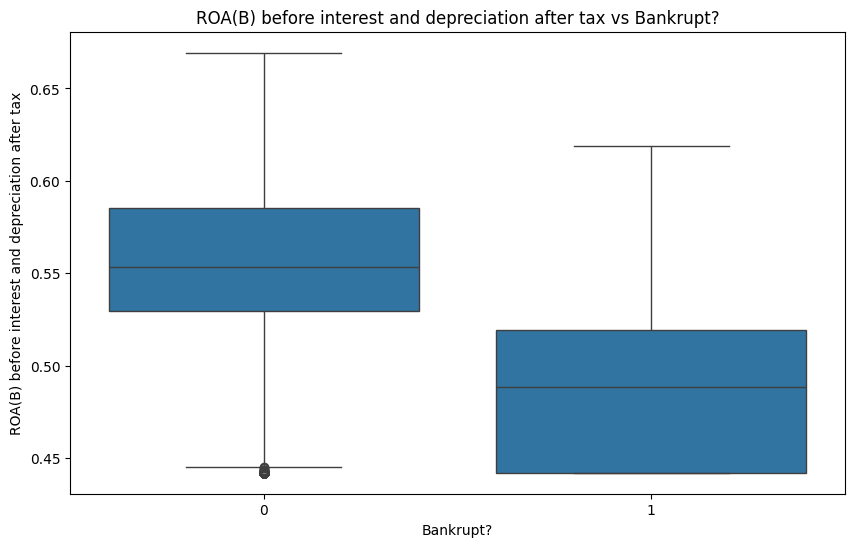

In [326]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bankrupt?', y='ROA(B) before interest and depreciation after tax', data=df)
plt.title('ROA(B) before interest and depreciation after tax vs Bankrupt?')
plt.xlabel('Bankrupt?')
plt.ylabel('ROA(B) before interest and depreciation after tax')
plt.show()


# obsevations:
# 50% of values of ROA(B) before interest and depreciation after tax for bankrupcy=1 are lies in range 0.45 to 0.52
# 50% of values of ROA(B) before interest and depreciation after tax for bankrupcy=0 are lies in range 0.53 to 0.59

# Chances of bankrupcy are more for lower value of ROA(B) before interest and depreciation after tax
# if value of ROA(B) before interest and depreciation after tax goes below 0.52 ,chances of getting bankrupt are more

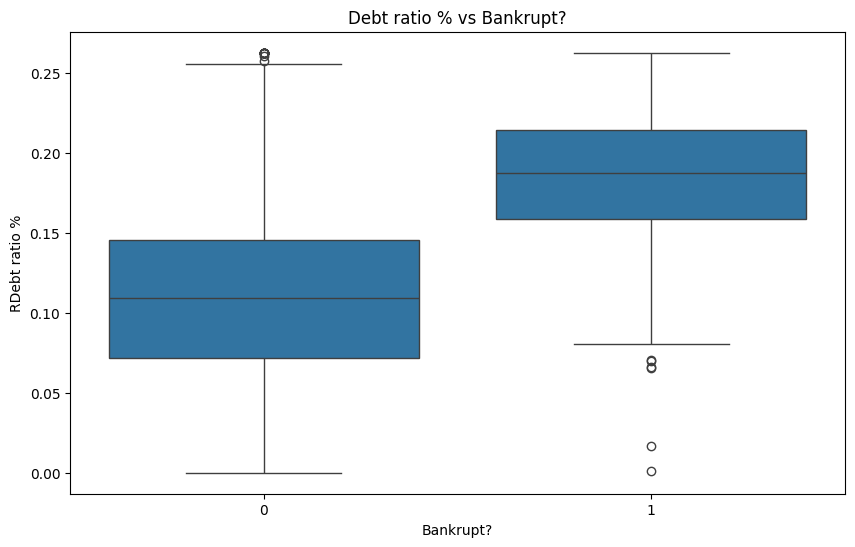

In [327]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bankrupt?', y='Debt ratio %', data=df)
plt.title('Debt ratio % vs Bankrupt?')
plt.xlabel('Bankrupt?')
plt.ylabel('RDebt ratio %')
plt.show()



# obsevations:
# 50% of values of Debt ratio % for bankrupcy=1 are lies in range 0.16 to 0.21
# 50% of values of Debt ratio % for bankrupcy=0 are lies in range 0.07 to 0.14

# Chances of bankrupcy are more for higher values of debt ratio %
# if value of ROA(B) before interest and depreciation after tax goes above 0.16 ,chances of getting bankrupt are more

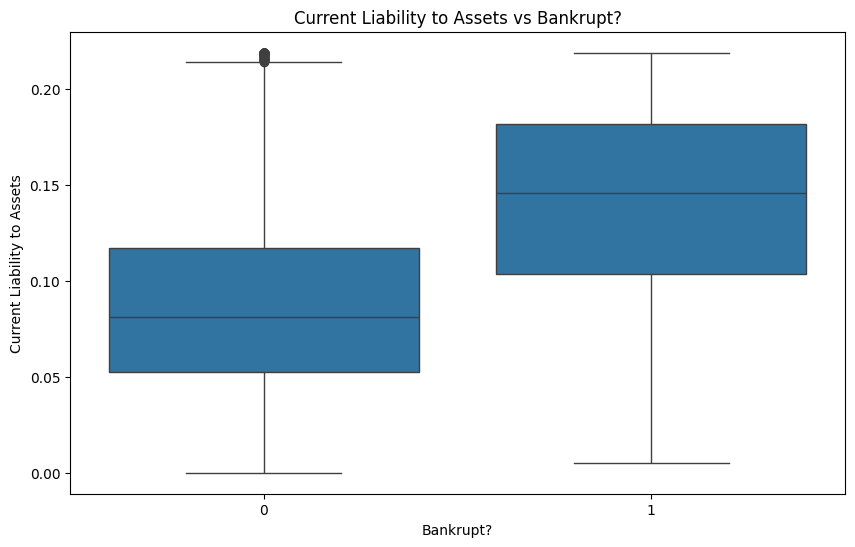

In [328]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bankrupt?', y='Current Liability to Assets', data=df)
plt.title('Current Liability to Assets vs Bankrupt?')
plt.xlabel('Bankrupt?')
plt.ylabel('Current Liability to Assets')
plt.show()


# obsevations:
# 50% of values of Current Liability to Assets for bankrupcy=1 are lies in range 0.10 to 0.17
# 50% of values of Current Liability to Assets for bankrupcy=0 are lies in range 0.05 to 0.11

# Chances of bankrupcy are more for higher values of debt ratio %
# if value ofCurrent Liability to Assets) before interest and depreciation after tax goes above 0.11 ,chances of getting bankrupt are more
# in range 0.10-0.11 there are values which falls in both catogiers

In [329]:
from scipy.stats import chi2_contingency, ttest_ind

# Example: T-test for numerical features
significant_features = []
for column in df.columns:
    if df[column].dtype in ['int64', 'float64'] and column != 'Bankrupt?':
        stat, p = ttest_ind(df[column][df['Bankrupt?'] == 1],
                            df[column][df['Bankrupt?'] == 0])
        if p < 0.05:
            significant_features.append(column)
            print(f'Feature: {column}, p-value: {p}')

Feature: Net Income to Total Assets, p-value: 2.5338191724464207e-102
Feature: ROA(A) before interest and % after tax, p-value: 1.453424003163958e-89
Feature: ROA(B) before interest and depreciation after tax, p-value: 1.867512034084068e-91
Feature: ROA(C) before interest and depreciation before interest, p-value: 1.3480464196848803e-89
Feature: Net worth/Assets, p-value: 5.8935839450365864e-95
Feature: Debt ratio %, p-value: 5.893583945032556e-95
Feature: Persistent EPS in the Last Four Seasons, p-value: 1.2850660613455893e-102
Feature: Retained Earnings to Total Assets, p-value: 7.462352910828833e-102
Feature: Net profit before tax/Paid-in capital, p-value: 1.1049936228065114e-95
Feature: Per Share Net profit before tax (Yuan ¥), p-value: 1.533367351973881e-94
Feature: Current Liability to Assets, p-value: 1.4758627634840955e-58
Feature: Working Capital to Total Assets, p-value: 1.5326177958071955e-58
Feature: Net Income to Stockholder's Equity, p-value: 3.3643835218933026e-99
Featur

# 1.created a empty list
# 2.iterated each column and checked for datatype weather it is int or float type
# 3.performed null hypothesis on each column with respect to 'bankrupt?' column
# 4. compared p value of each column with 0.05 and columns with less than p value than 0.05 are appended in empty list
# 5. this columns which are in the list are the features that influencing bankrupcy

In [335]:
print(significant_features) #these are the features which are significantly influencing bankrupcy

['Net Income to Total Assets', 'ROA(A) before interest and % after tax', 'ROA(B) before interest and depreciation after tax', 'ROA(C) before interest and depreciation before interest', 'Net worth/Assets', 'Debt ratio %', 'Persistent EPS in the Last Four Seasons', 'Retained Earnings to Total Assets', 'Net profit before tax/Paid-in capital', 'Per Share Net profit before tax (Yuan ¥)', 'Current Liability to Assets', 'Working Capital to Total Assets', "Net Income to Stockholder's Equity", 'Borrowing dependency', 'Current Liability to Current Assets', 'Liability to Equity', 'Net Value Per Share (A)', 'Net Value Per Share (B)', 'Net Value Per Share (C)', 'Current Liability to Equity']


In [337]:
correlation_matrix = df.corr()

In [339]:


# Compute the correlation with the target column
target_correlation = correlation_matrix['Bankrupt?']

# Separate columns based on the sign of their correlation coefficients
positive_correlation = target_correlation[target_correlation > 0].sort_values(ascending=False)
negative_correlation = target_correlation[target_correlation < 0].sort_values()

# Extract column names
positive_columns = positive_correlation.index.tolist()
negative_columns = negative_correlation.index.tolist()



# features with postive correlation 
# as value of below mentioned features increases , the chances of company getting bankrupt also increases

In [340]:
print(positive_columns)

['Bankrupt?', 'Borrowing dependency', 'Debt ratio %', 'Liability to Equity', 'Current Liability to Current Assets', 'Current Liability to Equity', 'Current Liability to Assets']


# features with negative correlation 
# as value of below mentioned features decreases , the chances of company getting bankrupt increases

In [342]:
print(negative_columns)

['Persistent EPS in the Last Four Seasons', 'Net Income to Total Assets', 'Retained Earnings to Total Assets', "Net Income to Stockholder's Equity", 'Net profit before tax/Paid-in capital', 'Net worth/Assets', 'Per Share Net profit before tax (Yuan ¥)', 'ROA(B) before interest and depreciation after tax', 'ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax', 'Net Value Per Share (B)', 'Net Value Per Share (A)', 'Net Value Per Share (C)', 'Working Capital to Total Assets']


In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 21 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Net Income to Total Assets                               6819 non-null   float64
 1   ROA(A) before interest and % after tax                   6819 non-null   float64
 2   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 3   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 4   Net worth/Assets                                         6819 non-null   float64
 5   Debt ratio %                                             6819 non-null   float64
 6   Persistent EPS in the Last Four Seasons                  6819 non-null   float64
 7   Retained Earnings to Total Assets                        6819 non-null   float64
 8   Net profit before tax/Paid-i

In [348]:
import sklearn

# Create New Features

In [353]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Create Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df.drop(columns=['Bankrupt?']))
poly_features = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(df.drop(columns=['Bankrupt?']).columns))

# Combine with the target variable
df_poly = pd.concat([poly_features, df['Bankrupt?']], axis=1)

In [355]:
df_poly.shape

(6819, 231)

In [356]:
# now new features are added in df_poly 

# Dimensionality Reduction using PCA

In [357]:
X = df.drop(columns=['Bankrupt?'])
y = df['Bankrupt?']
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca['Bankrupt?'] = y

# Feature Selection using RFE and RandomForest

In [358]:
# Feature Selection using RFE
model = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y)
selected_features_rfe = X.columns[fit.support_].tolist()

# Feature Selection using RandomForest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
selected_features_rf = feature_importances.head(10)['Feature'].tolist()

# Display results


In [361]:
print("Selected features using RFE:", selected_features_rfe)


Selected features using RFE: ['Net Income to Total Assets', 'ROA(A) before interest and % after tax', 'ROA(B) before interest and depreciation after tax', 'ROA(C) before interest and depreciation before interest', 'Net worth/Assets', 'Debt ratio %', 'Persistent EPS in the Last Four Seasons', 'Per Share Net profit before tax (Yuan ¥)', 'Current Liability to Assets', 'Working Capital to Total Assets']


In [360]:
print("Selected features using RandomForest:", selected_features_rf)

Selected features using RandomForest: ['Persistent EPS in the Last Four Seasons', 'Net profit before tax/Paid-in capital', 'Borrowing dependency', 'Net Value Per Share (B)', 'Debt ratio %', 'Net worth/Assets', 'Working Capital to Total Assets', 'Net Value Per Share (C)', 'Net Value Per Share (A)', 'Per Share Net profit before tax (Yuan ¥)']


# Split the data into features and target

In [363]:
X = df_poly.drop(columns=['Bankrupt?'])
y = df_poly['Bankrupt?']

# Split the data into training and testing sets

In [365]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to handle imbalanced data

In [368]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [369]:
# Standardize the features
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [370]:
# Apply Logistic Regression for classification
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_res_scaled, y_train_res)

LogisticRegression(max_iter=1000, random_state=42)

In [371]:
# Predict on test data
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

In [372]:
# Evaluate model performance using appropriate metrics
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [376]:
print("Confusion Matrix:\n", conf_matrix)



Confusion Matrix:
 [[1742  238]
 [  10   56]]


# True Positives (TP): 56
# True Negatives (TN): 1742
# False Positives (FP): 238
# False Negatives (FN): 10

In [374]:
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93      1980
           1       0.19      0.85      0.31        66

    accuracy                           0.88      2046
   macro avg       0.59      0.86      0.62      2046
weighted avg       0.97      0.88      0.91      2046



In [375]:
print("\nROC AUC Score:", roc_auc)


ROC AUC Score: 0.9318334863789409


# Key Observations:
# Imbalanced Classes: even after applying smote to handle imbalance data,
# The dataset is highly imbalanced with majority class (0) having 1980 samples and minority class (1) having only 66 samples.

# Accuracy: The overall accuracy of the model is 0.88, which is relatively high but can be misleading due to the class imbalance.

# Precision and Recall:

# Precision (for class 1): Precision is 0.19, meaning when the model predicts bankrupt (1), it is correct only 19% of the time.
# Recall (for class 1): Recall is 0.85, indicating that the model correctly identifies 85% of the bankrupt companies.
# F1-score (for class 1): F1-score is 0.31, which balances precision and recall, providing a harmonic mean between them.

# DETAILED REPORT
# KEY INSIGHTS AND RECOMMENDATIONS

# 1. **Debt Ratio % and Bankruptcy:**
#   - Debt Ratio % shows the highest positive correlation with bankruptcy. This implies that as the Debt Ratio % increases, the likelihood of bankruptcy also increases. 
#   - Actionable Insight: Monitoring and managing the Debt Ratio % closely is crucial. Implementing stricter debt management policies and ensuring that debt levels remain sustainable relative to assets and income is recommended.

# 2. **Net Income to Total Assets and Bankruptcy:**
#   - Net Income to Total Assets exhibits the highest negative correlation with bankruptcy. Lower values of Net Income to Total Assets indicate higher chances of bankruptcy.
#   - Actionable Insight: Focus on improving profitability relative to total assets. Strategies may include cost management, revenue enhancement, and efficient asset utilization.

# 3. **ROA(A) and ROA(B) before Interest and Taxes:**
#   - Both ROA(A) and ROA(B) before interest and taxes show negative correlations with bankruptcy, indicating that lower profitability ratios are associated with higher bankruptcy risks.
 #  - Actionable Insight: Enhance operational efficiency and profitability metrics. This could involve optimizing resource allocation, improving operational processes, and diversifying revenue streams.

# 4. **Current Liability to Assets:**
  # - Higher values of Current Liability to Assets are associated with increased bankruptcy risk. This ratio reflects short-term obligations relative to total assets.
  # - Actionable Insight: Manage short-term liabilities effectively. Strategies may include negotiating favorable terms with creditors, optimizing working capital management, and ensuring adequate cash flow for debt servicing.

### Recommendations for Financial Risk Management:

# 1. **Strengthen Financial Health Monitoring:**
#   - Implement regular monitoring of financial health indicators such as Debt Ratio %, Net Income to Total Assets, and ROA. Set threshold values for these metrics and trigger alerts for early intervention if thresholds are exceeded.

# 2. **Risk Mitigation Strategies:**
#   - Develop and implement robust risk mitigation strategies tailored to identified risk factors. For instance, establish contingency plans for managing debt levels during economic downturns or adverse market conditions.

# 3. **Enhance Financial Modeling and Forecasting:**
#   - Utilize advanced financial modeling techniques to forecast key financial ratios and their impact on bankruptcy risk. Incorporate scenario analysis to assess the resilience of the business under various economic scenarios.

# 4. **Diversification and Revenue Management:**
#   - Explore diversification strategies to reduce dependency on specific revenue sources or markets. Diversification can mitigate risks associated with fluctuations in market conditions or industry-specific challenges.

# 5. **Continuous Improvement and Adaptation:**
#   - Foster a culture of continuous improvement in financial management practices. Regularly review and adapt strategies based on evolving market dynamics, regulatory changes, and internal performance insights.
